In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import ast
from adjustText import adjust_text

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

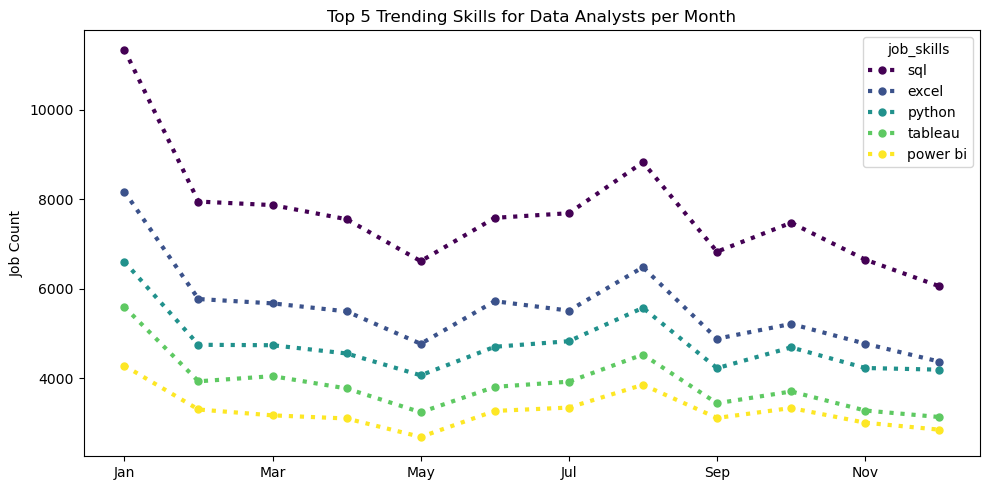

In [ ]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

# Adding a month no column
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month
df_da_exploded = df_da.explode('job_skills').copy() # Exploding the job_skills column


# Creating the pivot table
df_exploded_pivot = df_da_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value= 0)

# Reordering the columns based on total counts, by adding a 'Total' row, sorting by it, then removing it
df_exploded_pivot.loc['Total'] = df_exploded_pivot.sum()
df_exploded_pivot = df_exploded_pivot[df_exploded_pivot.loc['Total'].sort_values(ascending=False).index]
df_exploded_pivot = df_exploded_pivot.drop('Total')

# Formatting the index to show month names instead of numbers, by resetting the index, 
# converting the month numbers to month names, then setting the index back
df_exploded_pivot = df_exploded_pivot.reset_index()
df_exploded_pivot['job_posted_month'] = df_exploded_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_exploded_pivot = df_exploded_pivot.set_index('job_posted_month')
df_exploded_pivot = df_exploded_pivot.drop(columns='job_posted_month_no')

# Plotting the top 5 trending skills for Data Analysts per month
df_exploded_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth= 3,
    linestyle= ':', # options: '-', '--', '-.', ':'
    colormap= 'viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    marker= 'o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize= 5,
    figsize= (10, 5)
)


plt.title('Top 5 Trending Skills for Data Analysts per Month')
plt.ylabel('Job Count')
plt.xlabel('')
plt.tight_layout()
plt.show()

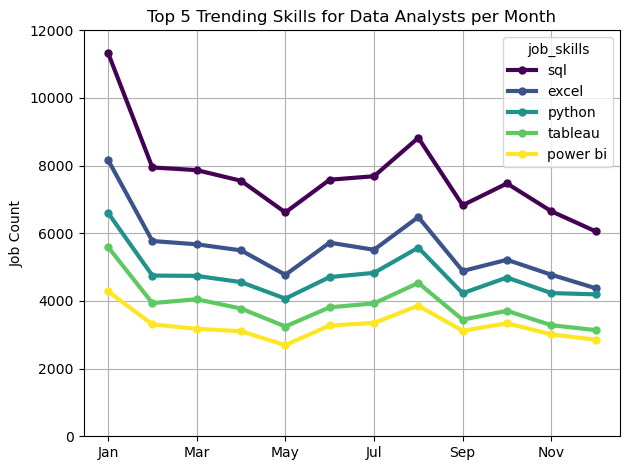

In [7]:
# Plotting the top 5 trending skills for Data Analysts per month
df_exploded_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth= 3,
    linestyle= '-', # options: '-', '--', '-.', ':'
    colormap= 'viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    marker= 'o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize= 5
)


plt.title('Top 5 Trending Skills for Data Analysts per Month')
plt.ylabel('Job Count')
plt.ylim(0, 12000)
plt.xlabel('')
plt.grid(True)
plt.tight_layout()
plt.show()

## Exercise 2


In [3]:
df_copy = df.copy()
df_copy = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df_copy.explode('job_skills')

# df_1 = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'size']).. less efficient, because using ,.agg doesn't let you decide the column names
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_count =  20
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending= False).head(skill_count)
skill_stats



,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


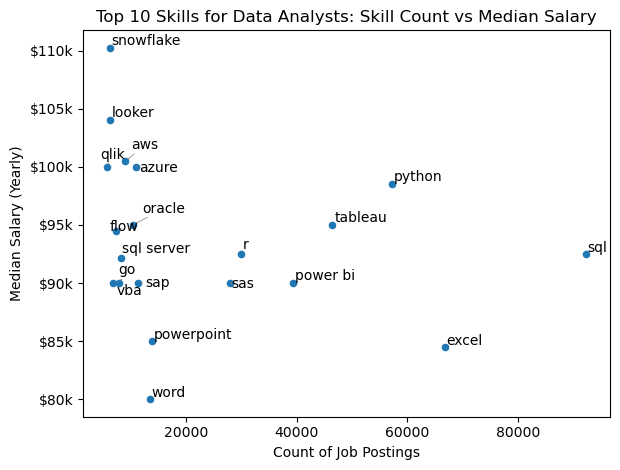

In [14]:
skill_stats.plot(kind= 'scatter', x= 'skill_count', y= 'median_salary')
plt.title('Top 10 Skills for Data Analysts: Skill Count vs Median Salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary (Yearly)')
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}k"))
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops= dict(arrowstyle= '->', color= 'gray', lw= 0.5))

plt.show()